In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1', index_col = 'object_id')

In [3]:
users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0


In [4]:
users.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [5]:
engagement = pd.read_csv('takehome_user_engagement.csv')

In [6]:
engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [7]:
engagement = engagement.set_index(pd.DatetimeIndex(engagement.time_stamp))
engagement

,time_stamp,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2013-12-25 03:45:04,2,1
...,...,...,...
2013-09-06 06:14:15,2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,2014-04-27 12:45:16,11998,1


In [8]:
engagement = engagement.drop('time_stamp', axis=1)
engagement

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [9]:
engagement_by_user = engagement.groupby('user_id').resample('1W').sum()
engagement_by_user

user_id  visited
user_id time_stamp                  
1       2014-04-27        1        1
2       2013-11-17        2        1
        2013-11-24        0        0
        2013-12-01        2        1
        2013-12-08        0        0
...                     ...      ...
11996   2013-09-08    11996        1
11997   2013-01-20    11997        1
11998   2014-04-27    11998        1
11999   2012-06-03    11999        1
12000   2014-01-26    12000        1

[82282 rows x 2 columns]

In [10]:
retained = engagement_by_user[engagement_by_user['visited'] >= 3].drop('user_id', axis = 1)
retained
#retained_users.index.name = 'user_id'

visited
user_id time_stamp         
2       2014-02-09        3
10      2013-03-03        3
        2013-04-14        3
        2013-04-28        3
        2013-05-05        4
...                     ...
11988   2014-04-06        3
        2014-05-04        4
        2014-05-18        3
        2014-05-25        5
        2014-06-01        3

[33859 rows x 1 columns]

In [11]:
retained = retained.groupby('user_id').apply(len)
retained = pd.DataFrame(retained)
retained = retained.rename(columns={0:'weeks_engaged'})
retained['adopted_user'] = 1
retained

,weeks_engaged,adopted_user
user_id,,
2,1,1
10,52,1
20,1,1
33,1,1
42,68,1
...,...,...
11965,1,1
11967,8,1
11969,22,1


In [12]:
users = users.merge(retained, how = 'outer', left_index = True, right_on = 'user_id')
users = users.reset_index(drop=True)
users = users.set_index('user_id')
users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,weeks_engaged,adopted_user
user_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,NaN,NaN
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,NaN,NaN
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,NaN,NaN


In [13]:
users.weeks_engaged[users['weeks_engaged'].isnull()] = 0
users.adopted_user[users['adopted_user'].isnull()] = 0
users

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,weeks_engaged,adopted_user
user_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,0.0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0.0,0.0
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,0.0


Setting with copy warning appears to have intended effect

In [14]:
users = users.drop(['name','email','last_session_creation_time', 'invited_by_user_id','creation_time'], axis = 1)
users

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,weeks_engaged,adopted_user
user_id,,,,,,
1,GUEST_INVITE,1,0,11,0.0,0.0
2,ORG_INVITE,0,0,1,1.0,1.0
3,ORG_INVITE,0,0,94,0.0,0.0
4,GUEST_INVITE,0,0,1,0.0,0.0
5,GUEST_INVITE,0,0,193,0.0,0.0
...,...,...,...,...,...,...
11996,ORG_INVITE,0,0,89,0.0,0.0
11997,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,0.0
11998,GUEST_INVITE,1,1,83,0.0,0.0


In [15]:
users.creation_source.value_counts(dropna=False)

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [16]:
users_cleaned = pd.get_dummies(users, columns=['creation_source'])

In [17]:
users_cleaned

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,weeks_engaged,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,,,
1,1,0,11,0.0,0.0,1,0,0,0,0
2,0,0,1,1.0,1.0,0,1,0,0,0
3,0,0,94,0.0,0.0,0,1,0,0,0
4,0,0,1,0.0,0.0,1,0,0,0,0
5,0,0,193,0.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11996,0,0,89,0.0,0.0,0,1,0,0,0
11997,0,0,200,0.0,0.0,0,0,0,0,1
11998,1,1,83,0.0,0.0,1,0,0,0,0


In [18]:
y = users_cleaned.pop('adopted_user')
X = users_cleaned

In [19]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [20]:
# feature selection function
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 1.683502
Feature 1: 0.809704
Feature 2: 3731.012579
Feature 3: 185049.333333
Feature 4: 14.100143
Feature 5: 1.443570
Feature 6: 37.926672
Feature 7: 4.048891
Feature 8: 6.446034


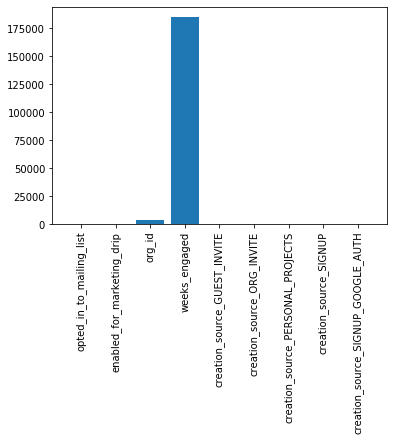

In [22]:
# Feature Selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, tick_label = list(X.columns))
plt.xticks(rotation = 90)
plt.show()

Realizing that weeks engaged is essentially a redundant metric for an adopted user (adopted users have >=3 weeks engaged) it is not surprising that that feature is overwhelmingly predictive. It should be removed from the dataset. 

In [23]:
X.pop('weeks_engaged')

user_id
1        0.0
2        1.0
3        0.0
4        0.0
5        0.0
        ... 
11996    0.0
11997    0.0
11998    0.0
11999    0.0
12000    0.0
Name: weeks_engaged, Length: 12000, dtype: float64

Feature 0: 1.683502
Feature 1: 0.809704
Feature 2: 3731.012579
Feature 3: 14.100143
Feature 4: 1.443570
Feature 5: 37.926672
Feature 6: 4.048891
Feature 7: 6.446034


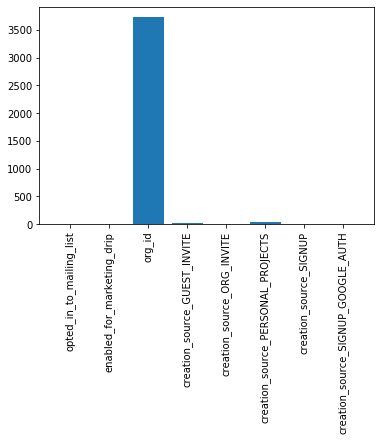

In [24]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Feature Selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, tick_label = list(X.columns))
plt.xticks(rotation=90)
plt.show()

# Conclusion

The top predictive features of adopted users are the org ID, the users being invited by the organization, and the users invited by other guests. This suggests that referral of a user by another user or organization adds something to the experience of the user causing them to use the platform more and become an adopted user. 